In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() 


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
# load the data 
path_='/content/gdrive/MyDrive/Entity_extarction_aftab/experi-different-model-aftab/social_dilema project/TheSocialDilemma.csv'
datframe=pd.read_csv(path_,usecols=['text','Sentiment'])

In [ ]:
datframe.head()

,text,Sentiment
0,@musicmadmarc @SocialDilemma_ @netflix @Facebo...,Neutral
1,@musicmadmarc @SocialDilemma_ @netflix @Facebo...,Neutral
2,Go watch “The Social Dilemma” on Netflix!\n\nI...,Positive
3,I watched #TheSocialDilemma last night. I’m sc...,Negative
4,The problem of me being on my phone most the t...,Positive


In [ ]:
datframe['text'].iloc[0],datframe.shape

("@musicmadmarc @SocialDilemma_ @netflix @Facebook I'm also reminded of the very poignant quote by French philosopher… https://t.co/CA52aepW6K",
 (20068, 2))

# Data analysis

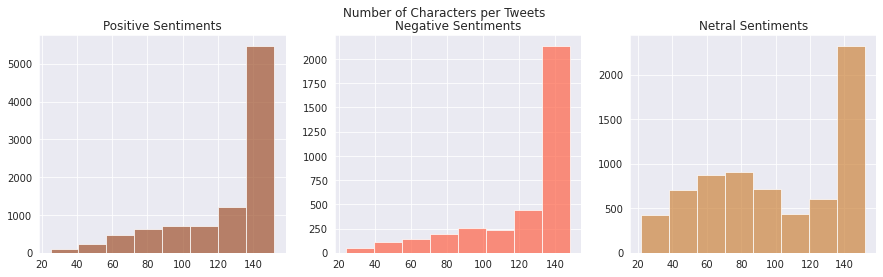

In [ ]:
sns.set_style('darkgrid')
n_bins =8
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,4))

tweet_len=datframe[datframe['Sentiment']=='Positive']['text'].str.len()
ax1.hist(tweet_len,color='sienna',bins=n_bins,alpha = 0.7)
ax1.set_title('Positive Sentiments')

tweet_len=datframe[datframe['Sentiment']=='Negative']['text'].str.len()
ax2.hist(tweet_len,bins=n_bins,color ='tomato', alpha = 0.7)                          
ax2.set_title('Negative Sentiments')

tweet_len=datframe[datframe['Sentiment']=='Neutral']['text'].str.len()
ax3.hist(tweet_len,bins=n_bins,color ='peru', alpha = 0.7)                          
ax3.set_title('Netral Sentiments')
fig.suptitle('Number of Characters per Tweets')
#plt.tight_layout(True)
plt.show()

### Length of Tweets 

Text(0.5, 1.0, 'Length of Tweets')

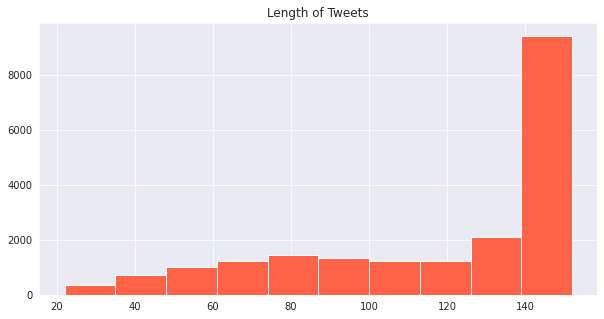

In [ ]:
def create_len_df(dataset):
    return dataset.apply(lambda row: pd.Series({
                                               'length_text':len(row['text'])}), axis=1)
len_train = create_len_df(datframe)
len_value=len_train.values
import seaborn as sns
sns.set_style('darkgrid')
fig,(ax1)=plt.subplots(1,1,figsize=(10,5))
ax1.hist(len_value,color='tomato')
ax1.set_title('Length of Tweets')

## Samples distribution

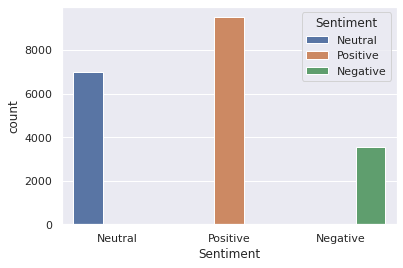

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='Sentiment', hue="Sentiment", data=datframe)

## Data Cleaning 

In [ ]:
import string
def data_pre_processing(data):
  corpus = []
  STOPWORDS = set(stopwords.words('english'))
  for i in range(len(data)):
      review = re.sub("#", "", data[i])
      review = re.sub(r'^https?:\/\/.*[\r\n]*', '',review, flags=re.MULTILINE)
      html=re.compile(r'<.*?>')
      review =html.sub(r"", review)
      review=re.sub(r'@\w+'," ",review)
      review=re.sub(r'#\w+'," ",review) 
      review=re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', review) 
      review=re.sub('[^A-Za-z\s]+',"", review)
      review = review.lower()
      review = review.split()
      review = [lemmatizer.lemmatize(word) for word in review if not word in STOPWORDS]
      review = ' '.join(review)
      corpus.append(review)
  return corpus


In [ ]:
all_text_arry=datframe['text'].tolist()
process_text=data_pre_processing(all_text_arry)
df_train_process_text=pd.DataFrame(process_text)
df_train_process_text.columns=['clean text']

In [ ]:
df_train_process_text.head()

,clean text
0,im also reminded poignant quote french philoso...
1,haa hey marc get youre saying amp dont agree w...
2,go watch social dilemma netflix best minute yo...
3,watched thesocialdilemma last night im scared ...
4,problem phone time trying watch thesocialdilemma


In [ ]:
Data_tarning=pd.concat([df_train_process_text,datframe['Sentiment']],axis=1)
Data_tarning.head()

,clean text,Sentiment
0,im also reminded poignant quote french philoso...,Neutral
1,haa hey marc get youre saying amp dont agree w...,Neutral
2,go watch social dilemma netflix best minute yo...,Positive
3,watched thesocialdilemma last night im scared ...,Negative
4,problem phone time trying watch thesocialdilemma,Positive


In [ ]:
#drop nun and duplicate values 
nan_value = float("NaN")
Data_tarning.replace("", nan_value, inplace=True)
Data_tarning.dropna(inplace=True)
Data_tarning = Data_tarning.drop_duplicates('clean text', keep='last')

In [ ]:
Data_tarning.shape

(18201, 2)

### Samples Distribution After Data Cleaning

Positive    9095
Neutral     5768
Negative    3338
Name: Sentiment, dtype: int64


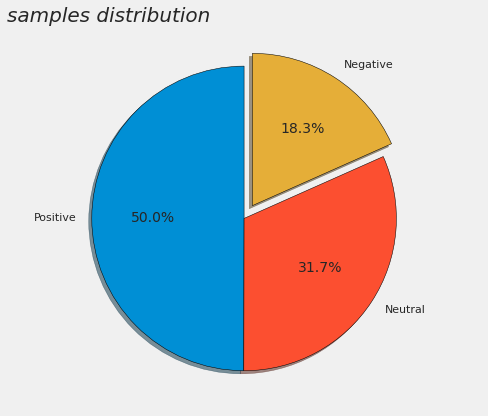

In [ ]:
values=Data_tarning['Sentiment'].value_counts()
print(values)
class_size=values.tolist()
plt.style.use("fivethirtyeight")
# Language Popularity
slices = class_size
labels = ['Positive','Neutral','Negative']
fig = plt.figure(1, figsize=(7,6))
ax = fig.add_subplot(111)
ax.axis('equal')
expode=[0,0,0.1]

ax.pie(slices,labels=labels,wedgeprops={'edgecolor': 'black'},
        autopct='%1.1f%%',explode=expode,shadow=True, startangle=90,)

plt.title(label="samples distribution", 
          loc="left", 
          fontstyle='italic',
          fontsize=20
          ) 
plt.tight_layout()

plt.show()


# With out handling inbalance data set

In [ ]:
Data_tarning.Sentiment

0         Neutral
1         Neutral
2        Positive
3        Negative
4        Positive
           ...   
20063    Negative
20064    Positive
20065    Negative
20066    Positive
20067     Neutral
Name: Sentiment, Length: 18201, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

labels_all=pd.get_dummies(Data_tarning.Sentiment)

labels_all.head()



,Negative,Neutral,Positive
0,0,1,0
1,0,1,0
2,0,0,1
3,1,0,0
4,0,0,1


In [ ]:

Data_tarning=pd.concat([Data_tarning,labels_all],axis=1)

Data_tarning.drop('Sentiment', 1,inplace=True)
Data_tarning.head()

,clean text,Negative,Neutral,Positive
0,im also reminded poignant quote french philoso...,0,1,0
1,haa hey marc get youre saying amp dont agree w...,0,1,0
2,go watch social dilemma netflix best minute yo...,0,0,1
3,watched thesocialdilemma last night im scared ...,1,0,0
4,problem phone time trying watch thesocialdilemma,0,0,1


In [ ]:
!pip install --upgrade keras

Requirement already up-to-date: keras in /usr/local/lib/python3.7/dist-packages (2.4.3)


In [ ]:

import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Conv1D
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

In [ ]:
train_df, test_df = train_test_split(Data_tarning, test_size=0.33, random_state=42)

In [ ]:
train_df.shape,test_df.shape


((12194, 4), (6007, 4))

In [ ]:
seq_lengths = train_df['clean text'].apply(lambda x: len(x.split(' ')))
seq_lengths.describe()

count    12194.000000
mean         8.550353
std          2.721581
min          1.000000
25%          7.000000
50%          9.000000
75%         10.000000
max         19.000000
Name: clean text, dtype: float64

In [ ]:
train_df.head()

,clean text,Negative,Neutral,Positive
1142,thesocialdilemma trending tweet right fascinat...,0,0,1
4279,moral story one sell drug never consumes theso...,0,1,0
19616,finished thesocialdilemma wow expanded thinkin...,0,0,1
16375,starting thesocialdilemma delete medias never ...,1,0,0
17018,excellently shown development unconscious bias...,0,0,1


In [ ]:
train_X = train_df["clean text"].values
train_Y=train_df[train_df.columns[1:4]].values
test_X = test_df["clean text"].values
test_Y=test_df[test_df.columns[1:4]].values


In [ ]:
test_Y

array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1]], dtype=uint8)

In [ ]:
embed_size = 300 # how big is each word vector
max_features = 5000 # how many unique words to use (i.e num rows in embedding vector)
maxlen =19 # max size of tweets after data cleaning 
## Tokenize the sentences
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(train_X))
train_X = tokenizer.texts_to_sequences(train_X)
test_X = tokenizer.texts_to_sequences(test_X)
## Pad the sentences 
train_X = pad_sequences(train_X, maxlen=maxlen)
test_X = pad_sequences(test_X, maxlen=maxlen)

In [ ]:
test_X

array([[   0,    0,    0, ...,    1,   90,  725],
       [   0,    0,    0, ...,    1, 1307, 1694],
       [   0,    0,    0, ...,  198, 1016,  402],
       ...,
       [   0,    0,    0, ..., 1827, 2498, 2415],
       [   0,    0,    0, ...,   19, 1518,  593],
       [   0,    0,    0, ...,  308,    2,  715]], dtype=int32)

### Glove embedding 

In [ ]:
EMBEDDING_FILE = '/content/gdrive/MyDrive/Entity_extarction_aftab/experi-different-model-aftab/glove.6B.300d.txt'
def get_coefs(word,*arr): 
  return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(EMBEDDING_FILE))

In [ ]:
print('embeddings_index',len(embeddings_index))
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]
word_index = tokenizer.word_index
print('word_index',word_index)
print('max_features',max_features)
nb_words = min(max_features, len(word_index))
print(nb_words)
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
print('embedding_matrix',embedding_matrix.shape)
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

embeddings_index 400001


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


word_index {'thesocialdilemma': 1, 'social': 2, 'watch': 3, 'netflix': 4, 'medium': 5, 'watching': 6, 'watched': 7, 'documentary': 8, 'dilemma': 9, 'im': 10, 'must': 11, 'everyone': 12, 'people': 13, 'time': 14, 'need': 15, 'like': 16, 'know': 17, 'twitter': 18, 'u': 19, 'product': 20, 'one': 21, 'amp': 22, 'dont': 23, 'really': 24, 'think': 25, 'see': 26, 'thing': 27, 'phone': 28, 'make': 29, 'recommend': 30, 'go': 31, 'facebook': 32, 'tech': 33, 'want': 34, 'please': 35, 'good': 36, 'get': 37, 'youre': 38, 'eye': 39, 'thought': 40, 'highly': 41, 'world': 42, 'technology': 43, 'scary': 44, 'great': 45, 'last': 46, 'irony': 47, 'right': 48, 'news': 49, 'much': 50, 'new': 51, 'feel': 52, 'finished': 53, 'ive': 54, 'important': 55, 'seen': 56, 'already': 57, 'interesting': 58, 'havent': 59, 'say': 60, 'also': 61, 'movie': 62, 'every': 63, 'yet': 64, 'even': 65, 'notification': 66, 'would': 67, 'use': 68, 'way': 69, 'user': 70, 'tweet': 71, 'paying': 72, 'mind': 73, 'well': 74, 'life': 75

In [ ]:
import pandas as pd
from keras.models import Sequential
from keras.layers.recurrent import LSTM, GRU
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.embeddings import Embedding
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence


## Model creation & trainning

In [ ]:
## Creating model
model1=Sequential()
model1.add(Embedding(input_dim=max_features, output_dim=embed_size,weights=[embedding_matrix],trainable=True,input_length=maxlen))
model1.add(Bidirectional(LSTM(200)))
model1.add(Dropout(0.3))
model1.add(Dense(50, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(30, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(3,activation='softmax'))
model1.compile(loss='kullback_leibler_divergence',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 19, 300)           1500000   
_________________________________________________________________
bidirectional_5 (Bidirection (None, 400)               801600    
_________________________________________________________________
dropout_15 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 50)                20050     
_________________________________________________________________
dropout_16 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 30)                1530      
_________________________________________________________________
dropout_17 (Dropout)         (None, 30)               

In [ ]:
train_X.shape

(12194, 19)

In [ ]:
model1.fit(train_X, train_Y, batch_size=30, epochs=10)

Epoch 1/10
407/407 [==============================] - 9s 16ms/step - loss: 0.8906 - accuracy: 0.5885
Epoch 2/10
407/407 [==============================] - 7s 18ms/step - loss: 0.3998 - accuracy: 0.8693
Epoch 3/10
407/407 [==============================] - 7s 18ms/step - loss: 0.2650 - accuracy: 0.9220
Epoch 4/10
407/407 [==============================] - 7s 18ms/step - loss: 0.1877 - accuracy: 0.9436
Epoch 5/10
407/407 [==============================] - 7s 18ms/step - loss: 0.1390 - accuracy: 0.9576
Epoch 6/10
407/407 [==============================] - 7s 18ms/step - loss: 0.1102 - accuracy: 0.9665
Epoch 7/10
407/407 [==============================] - 7s 18ms/step - loss: 0.0867 - accuracy: 0.9703
Epoch 8/10
407/407 [==============================] - 7s 18ms/step - loss: 0.0611 - accuracy: 0.9810
Epoch 9/10
407/407 [==============================] - 7s 18ms/step - loss: 0.0476 - accuracy: 0.9860
Epoch 10/10
407/407 [==============================] - 7s 18ms/step - loss: 0.0439 - accura

In [ ]:
y_pred=model1.predict_classes(test_X)

# Making the Confusion Matrix
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(test_Y.argmax(axis=1), y_pred, target_names=['Class Negative', 'Class Neutral','Class postive']))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '



Classification Report

                precision    recall  f1-score   support

Class Negative       0.76      0.78      0.77      1093
 Class Neutral       0.87      0.87      0.87      1917
 Class postive       0.90      0.89      0.89      2997

      accuracy                           0.86      6007
     macro avg       0.84      0.85      0.84      6007
  weighted avg       0.86      0.86      0.86      6007



#### In this project i also handle Data inbalance 

## Handling Data inbalance 

In [ ]:
H_Data_tarning=Data_tarning
H_Data_tarning.head(10)

,clean text,Negative,Neutral,Positive
0,im also reminded poignant quote french philoso...,0,1,0
1,haa hey marc get youre saying amp dont agree w...,0,1,0
2,go watch social dilemma netflix best minute yo...,0,0,1
3,watched thesocialdilemma last night im scared ...,1,0,0
4,problem phone time trying watch thesocialdilemma,0,0,1
5,thesocialdilemma wow need regulation social me...,0,0,1
7,erm thesocialdilemma make want go grid live ca...,1,0,0
9,okay im watching thesocialdilemma,0,0,1
10,okey okey ive peer pressured watching thesocia...,0,0,1
11,put documentary speaking social medium addicti...,0,0,1


In [ ]:
max_len = 19
len_voc = 5000

In [ ]:
from sklearn.model_selection import train_test_split
h_df_train, h_df_test = train_test_split(H_Data_tarning, test_size=0.2)

In [ ]:
def make_tokenizer(texts, len_voc):
    from keras.preprocessing.text import Tokenizer
    t = Tokenizer(num_words=len_voc)
    t.fit_on_texts(texts)
    return t

In [ ]:
tokenizer = make_tokenizer(H_Data_tarning['clean text'], len_voc)

In [ ]:
X_train = tokenizer.texts_to_sequences(h_df_train['clean text'])
X_test = tokenizer.texts_to_sequences(h_df_test['clean text'])

In [ ]:
# padding 
from keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(X_train, maxlen=max_len, padding='post', truncating='post')
X_test = pad_sequences(X_test, maxlen=max_len, padding='post', truncating='post')

In [ ]:
X_train[0:50]

In [ ]:
y_train = h_df_train[h_df_train.columns[1:4]].values
y_test = h_df_test[h_df_test.columns[1:4]].values

In [ ]:
y_train

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1]], dtype=uint8)

In [ ]:
EMBEDDING_FILE = '/content/gdrive/MyDrive/Entity_extarction_aftab/experi-different-model-aftab/glove.6B.300d.txt'
def get_coefs(word,*arr): 
  return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(EMBEDDING_FILE))



In [ ]:
def make_embedding_matrix(embedding, tokenizer, len_voc):
    all_embs = np.stack(embedding.values())
    emb_mean,emb_std = all_embs.mean(), all_embs.std()
    embed_size = all_embs.shape[1]
    word_index = tokenizer.word_index
    embedding_matrix = np.random.normal(emb_mean, emb_std, (len_voc, embed_size))
    
    for word, i in word_index.items():
        if i >= len_voc:
            continue
        embedding_vector = embedding.get(word)
        if embedding_vector is not None: 
            embedding_matrix[i] = embedding_vector
    
    return embedding_matrix

In [ ]:
embed_mat = make_embedding_matrix(embeddings_index, tokenizer, len_voc)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
X_train_emb = embed_mat[X_train]
X_test_emb = embed_mat[X_test]

In [ ]:
X_train_emb

## SMOTE Oversampling

In [ ]:
train_size, max_len, embed_size = X_train_emb.shape
train_size, max_len, embed_size

(14560, 19, 300)

In [ ]:
X_train_emb_r = X_train_emb.reshape(train_size, max_len*embed_size)
X_train_emb_r.shape

(14560, 5700)

In [ ]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
smt = SMOTE()
X_smote, y_smote = smt.fit_sample(X_train_emb_r, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_smote.shape

(21840, 5700)

In [ ]:
X_smote = X_smote.reshape((X_smote.shape[0], max_len, embed_size))


In [ ]:
X_smote.shape

(21840, 19, 300)

In [ ]:
y_smote.shape

(21840, 3)

##Model creation & Trainning

In [ ]:
## Creating model
model1=Sequential()
model1.add(Bidirectional(LSTM(200)))
model1.add(Dropout(0.3))
model1.add(Dense(50, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(30, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(3,activation='softmax'))
model1.compile(loss='kullback_leibler_divergence',optimizer='adam',metrics=['accuracy'])
#print(model1.summary())

In [ ]:
model1.fit(X_smote, y_smote, batch_size=30, epochs=10)
print(model1.summary())

Epoch 1/10
728/728 [==============================] - 9s 8ms/step - loss: 0.8892 - accuracy: 0.5781
Epoch 2/10
728/728 [==============================] - 5s 7ms/step - loss: 0.5218 - accuracy: 0.8009
Epoch 3/10
728/728 [==============================] - 5s 7ms/step - loss: 0.3821 - accuracy: 0.8574
Epoch 4/10
728/728 [==============================] - 5s 8ms/step - loss: 0.2705 - accuracy: 0.9057
Epoch 5/10
728/728 [==============================] - 5s 7ms/step - loss: 0.1887 - accuracy: 0.9358
Epoch 6/10
728/728 [==============================] - 5s 7ms/step - loss: 0.1418 - accuracy: 0.9525
Epoch 7/10
728/728 [==============================] - 5s 7ms/step - loss: 0.1005 - accuracy: 0.9677
Epoch 8/10
728/728 [==============================] - 5s 7ms/step - loss: 0.0833 - accuracy: 0.9728
Epoch 9/10
728/728 [==============================] - 5s 7ms/step - loss: 0.0582 - accuracy: 0.9813
Epoch 10/10
728/728 [==============================] - 5s 7ms/step - loss: 0.0560 - accuracy: 0.9812

In [ ]:
y_pred=model1.predict_classes(X_test_emb)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test.argmax(axis=1), y_pred, target_names=['Class Negative', 'Class Neutral','Class postive']))


Classification Report

                precision    recall  f1-score   support

Class Negative       0.73      0.68      0.70       690
 Class Neutral       0.83      0.84      0.84      1136
 Class postive       0.86      0.87      0.87      1815

      accuracy                           0.83      3641
     macro avg       0.81      0.80      0.80      3641
  weighted avg       0.83      0.83      0.83      3641



In [ ]:
from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(y_test, y_pred)
cm =confusion_matrix(y_test.argmax(axis=1), y_pred)
cm

array([[ 468,   85,  137],
       [  60,  959,  117],
       [ 117,  110, 1588]])

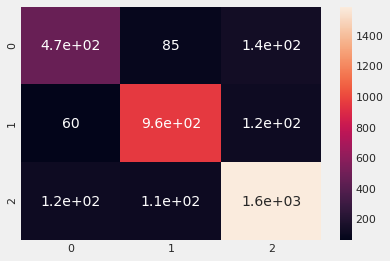

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True)

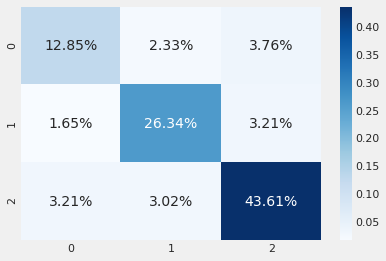

In [ ]:
import seaborn as sns
#sns.heatmap(cm, annot=True)

sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')